<a href="https://colab.research.google.com/github/lufangchi/building_blocks/blob/main/cluster_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Reading the dataset in and showing the head of the dataframe
customers = pd.read_csv('Mall_Customers.csv')
customers.head(10)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
print('Null Values In Dataset: ', customers.isnull().sum())
print()
print('Duplicate Values In Dataset: ', customers.duplicated().sum())
print()


Null Values In Dataset:  CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Duplicate Values In Dataset:  0



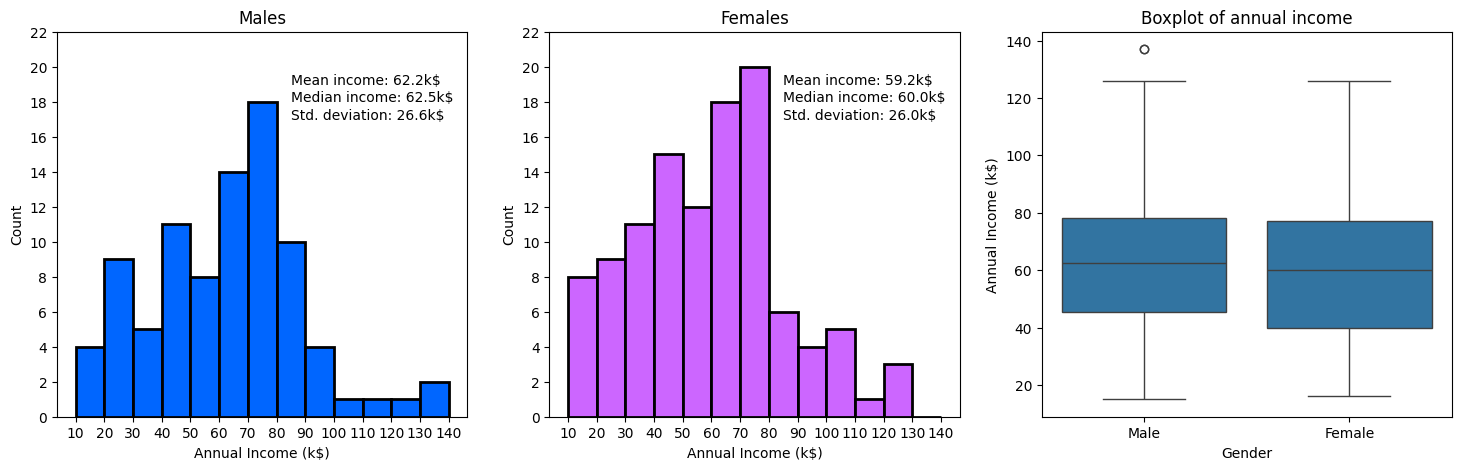

In [11]:
# Subsets with males' and females' annual income
males_income = customers[customers['Gender']=='Male']['Annual Income (k$)']
females_income = customers[customers['Gender']=='Female']['Annual Income (k$)']
my_bins = range(10,150,10)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))
# Drawing males histogram
ax1.hist(males_income, bins=my_bins, color='#0066ff', edgecolor="k",linewidth=2)
ax1.set_xticks(my_bins)
ax1.set_yticks(range(0,24,2))
ax1.set_ylim(0,22)
ax1.set_title('Males')
ax1.set_xlabel('Annual Income (k$)')
ax1.set_ylabel('Count')
ax1.text(85,19, "Mean income: {:.1f}k$".format(males_income.mean()))
ax1.text(85,18, "Median income: {:.1f}k$".format(males_income.median()))
ax1.text(85,17, "Std. deviation: {:.1f}k$".format(males_income.std()))

# Drawing females histogram
ax2.hist(females_income, bins=my_bins, color='#cc66ff', edgecolor="k",linewidth=2)
ax2.set_xticks(my_bins)
ax2.set_yticks(range(0,24,2))
ax2.set_ylim(0,22)
ax2.set_title('Females')
ax2.set_xlabel('Annual Income (k$)')
ax2.set_ylabel('Count')
ax2.text(85,19, "Mean income: {:.1f}k$".format(females_income.mean()))
ax2.text(85,18, "Median income: {:.1f}k$".format(females_income.median()))
ax2.text(85,17, "Std. deviation: {:.1f}k$".format(females_income.std()))

# boxplot
sns.boxplot(x='Gender', y='Annual Income (k$)', data=customers, ax=ax3)
ax3.set_title('Boxplot of annual income')
plt.show()

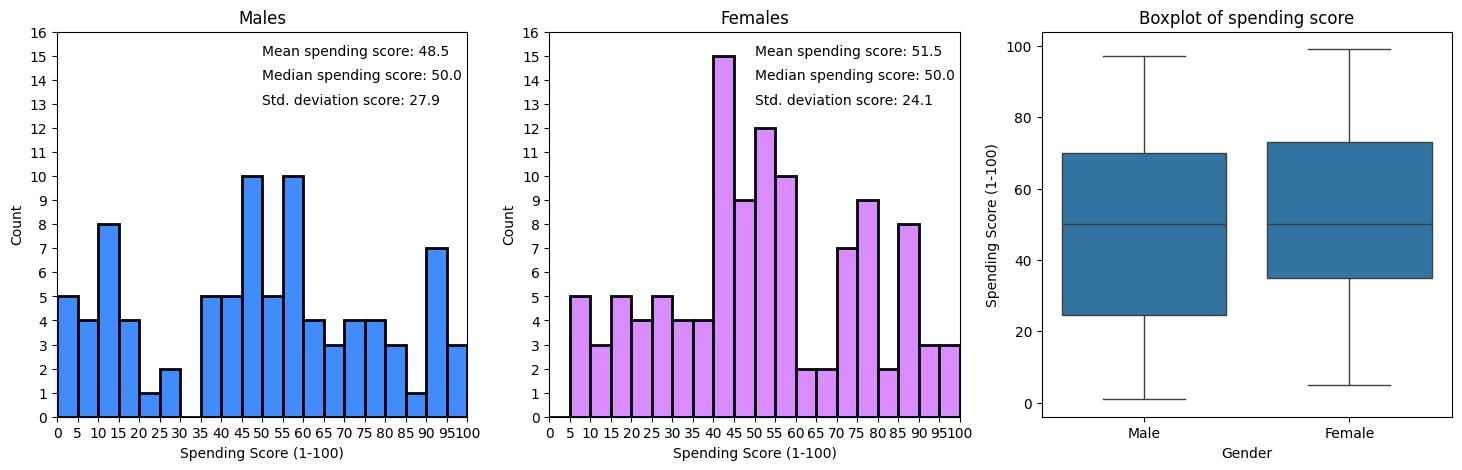

In [15]:
males_spending = customers[customers['Gender']=='Male']['Spending Score (1-100)']
females_spending = customers[customers['Gender']=='Female']['Spending Score (1-100)']
spending_bins = range(0,105,5)
# males histogram
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))
sns.histplot(males_spending, bins=spending_bins, kde=False, color='#0066ff',ax=ax1, edgecolor="k", linewidth=2)
ax1.set_xticks(spending_bins)
ax1.set_xlim(0,100)
ax1.set_yticks(range(0,17,1))
ax1.set_ylim(0,16)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(50,15, "Mean spending score: {:.1f}".format(males_spending.mean()))
ax1.text(50,14, "Median spending score: {:.1f}".format(males_spending.median()))
ax1.text(50,13, "Std. deviation score: {:.1f}".format(males_spending.std()))
# females histogram
sns.histplot(females_spending, bins=spending_bins, kde=False, color='#cc66ff',ax=ax2, edgecolor="k", linewidth=2)
ax2.set_xticks(spending_bins)
ax2.set_xlim(0,100)
ax2.set_yticks(range(0,17,1))
ax2.set_ylim(0,16)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(50,15, "Mean spending score: {:.1f}".format(females_spending.mean()))
ax2.text(50,14, "Median spending score: {:.1f}".format(females_spending.median()))
ax2.text(50,13, "Std. deviation score: {:.1f}".format(females_spending.std()))
# boxplot
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=customers, ax=ax3)
ax3.set_title('Boxplot of spending score')
plt.show()


<ipython-input-16-adae640ef32a>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians_by_age_group = customers.groupby(["Gender",pd.cut(customers['Age'],age_bins)]).median()


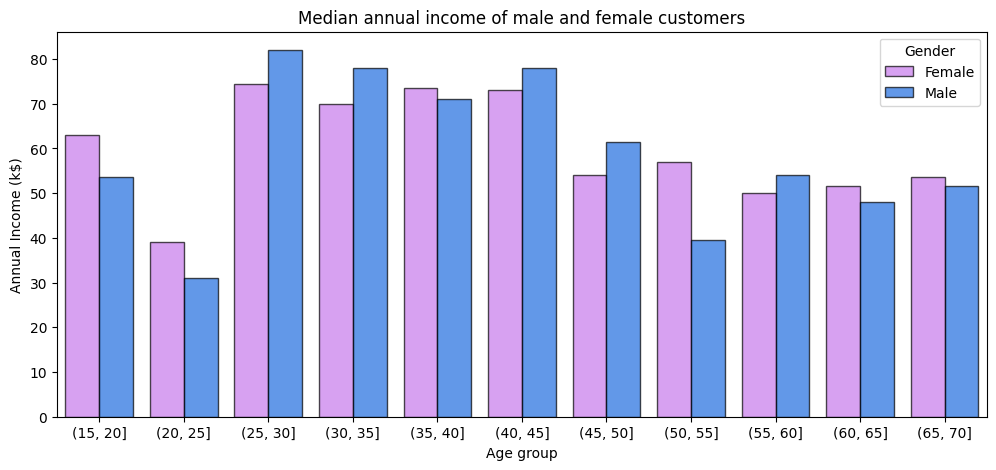

In [16]:
age_bins = range(15,75,5)
medians_by_age_group = customers.groupby(["Gender",pd.cut(customers['Age'],age_bins)]).median()
medians_by_age_group.index = medians_by_age_group.index.set_names(['Gender','Age_group'])
medians_by_age_group.reset_index(inplace=True)
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x='Age_group', y='Annual Income (k$)', hue='Gender',data=medians_by_age_group,palette=['#cc66ff','#0066ff'],alpha=0.7,edgecolor='k',ax=ax)
ax.set_title('Median annual income of male and female customers')
ax.set_xlabel('Age group')
plt.show()

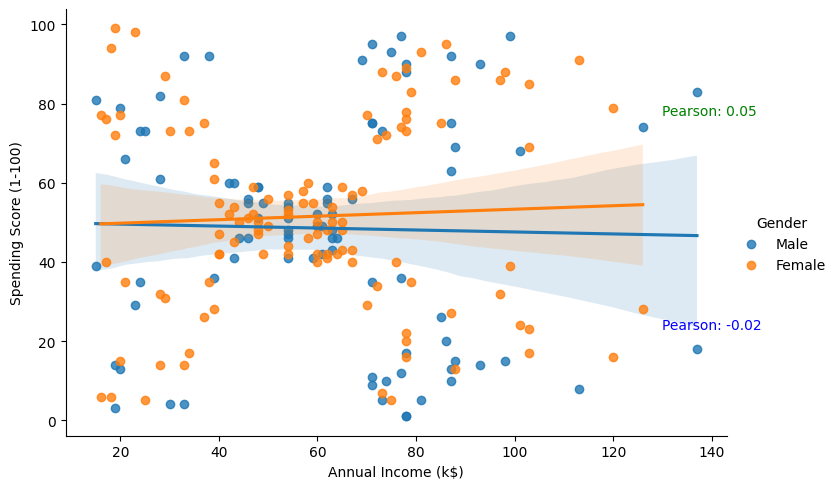

In [18]:
from scipy.stats import pearsonr
# Calculating Pearson's correlations
corr1, _ = pearsonr(males_income.values, males_spending.values)
corr2, _ = pearsonr(females_income.values, females_spending.values)
sns.lmplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=customers,hue='Gender', aspect=1.5)
plt.text(130,23, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(130,77, 'Pearson: {:.2f}'.format(corr2), color='green')
plt.show()

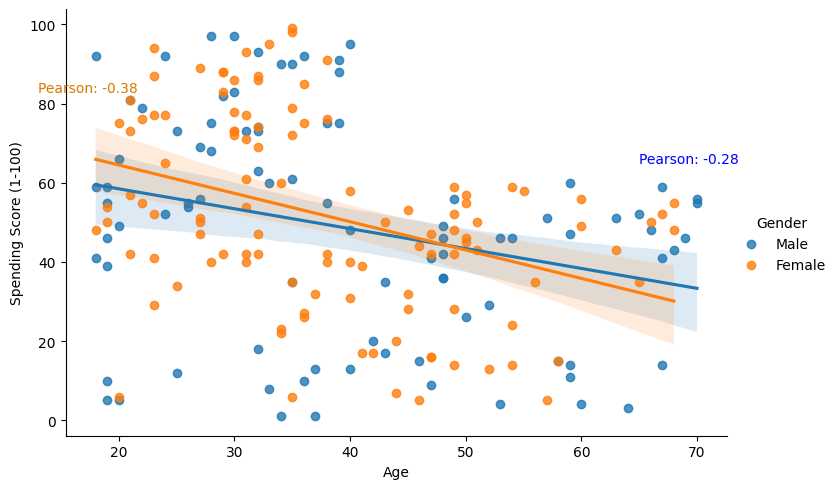

In [19]:
# Subsets with males' and females' age
males_age = customers[customers['Gender']=='Male']['Age']
females_age = customers[customers['Gender']=='Female']['Age']
# calculating Pearson's correlations
corr1, _ = pearsonr(males_age.values, males_spending.values)
corr2, _ = pearsonr(females_age.values, females_spending.values)
sns.lmplot(x='Age', y='Spending Score (1-100)', data=customers, hue='Gender',aspect=1.5)
plt.text(65,65, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(13,83, 'Pearson: {:.2f}'.format(corr2), color='#d97900')
plt.show()


In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [21]:
X = customers[['Age', 'Annual Income (k$)','Spending Score (1-100)']]

In [22]:
scaler = StandardScaler()

In [23]:
scaler.fit_transform(X)
scaler

StandardScaler()

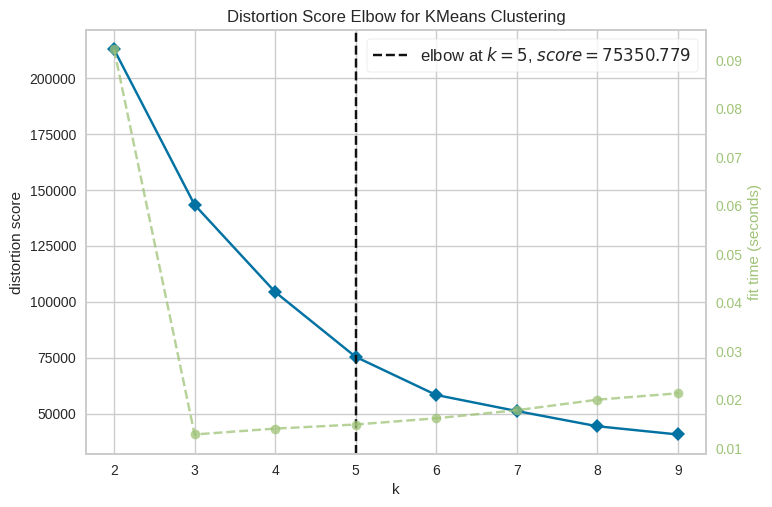

In [24]:
# Importing the elbow visualizer
from yellowbrick.cluster import KElbowVisualizer
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(X)
visualizer.show()
plt.show()


# New section